<a href="https://colab.research.google.com/github/abhinay0609/personality_prediction_from_Social_Media/blob/main/Week%204/Day_12_Hyperparameter_Tuning_and_Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving MBTI Dataset.zip to MBTI Dataset (1).zip


In [5]:
# Step 1: Unzip the File

import zipfile

# Unzip the uploaded file
with zipfile.ZipFile("MBTI Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("mbti_data")


In [6]:
# Step 2: Locate and Read the CSV

import pandas as pd

# Load the CSV (adjust name if different)
df = pd.read_csv("mbti_data/mbti_1.csv")
df.head()


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [7]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download if not done already
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # 3. Remove usernames or mentions (e.g. @user)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 6. Tokenize (split into words)
    tokens = text.split()

    # 7. Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # 8. Lemmatization (converts words to base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 9. Join cleaned tokens back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df['cleaned_posts'] = df['posts'].apply(clean_text_advanced)
df[['type', 'cleaned_posts']].head()


,type,cleaned_posts
0,INFJ,intj moment sportscenter top ten play prankswh...
1,ENTP,finding lack post alarmingsex boring position ...
2,INTP,good one course say know thats blessing cursed...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,youre firedthats another silly misconception a...


In [9]:
# #  Step 3: Text Cleaning Function

# import string
# import re

# def clean_text(text):
#     # Lowercase
#     text = text.lower()
#     # Remove URLs
#     text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
#     # Remove punctuation
#     text = ''.join([char for char in text if char not in string.punctuation])
#     return text

# # Apply to 'posts' column
# df['cleaned_posts'] = df['posts'].apply(clean_text)
# df[['type', 'cleaned_posts']].head()


In [10]:
# See unique personality types in the dataset
print(df['type'].unique())


['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [11]:
# Count the frequency of each MBTI type
label_counts = df['type'].value_counts()
print(label_counts)


type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


/tmp/ipython-input-12-833439721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


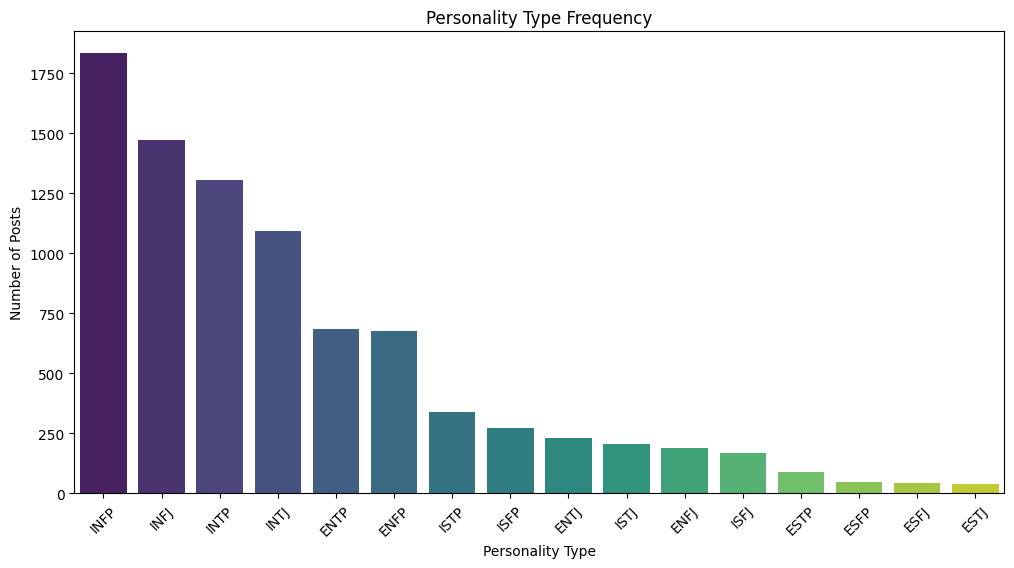

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Personality Type Frequency')
plt.xlabel('Personality Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Step 2: Apply TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit to 1000 features for speed

# Fit & transform
X = vectorizer.fit_transform(df['cleaned_posts'])

# Labels (Y)
y = df['type']

print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (8675, 1000)


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['type'])  # Now y will be numeric


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.646685878962536
              precision    recall  f1-score   support

           0       0.40      0.54      0.46        41
           1       0.66      0.66      0.66       125
           2       0.41      0.73      0.52        44
           3       0.61      0.62      0.62       135
           4       0.08      0.29      0.13         7
           5       0.00      0.00      0.00         8
           6       0.30      0.43      0.35         7
           7       0.50      0.53      0.52        15
           8       0.71      0.56      0.62       288
           9       0.76      0.69      0.73       370
          10       0.67      0.64      0.66       193
          11       0.77      0.73      0.75       293
          12       0.63      0.58      0.60        45
          13       0.51      0.68      0.59        53
          14       0.47      0.64      0.54        44
          15       0.53      0.69      0.60        67

    accuracy                           0.65      173

In [18]:
# Model Improvement Using SVM

# 1. Import & Train SVM

from sklearn.svm import LinearSVC

# Train SVM model
svm_model = LinearSVC(class_weight='balanced', max_iter=10000)
svm_model.fit(X_train, y_train)


LinearSVC(class_weight='balanced', max_iter=10000)

In [19]:
# 2. Make Predictions

y_pred_svm = svm_model.predict(X_test)


In [20]:
#  3. Evaluate the Model

from sklearn.metrics import classification_report, accuracy_score

# Print accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# Print detailed classification report
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6028818443804035
              precision    recall  f1-score   support

           0       0.38      0.49      0.43        41
           1       0.54      0.58      0.56       125
           2       0.43      0.57      0.49        44
           3       0.55      0.58      0.57       135
           4       0.15      0.29      0.20         7
           5       0.00      0.00      0.00         8
           6       0.38      0.43      0.40         7
           7       0.40      0.40      0.40        15
           8       0.67      0.57      0.62       288
           9       0.75      0.68      0.71       370
          10       0.59      0.60      0.59       193
          11       0.71      0.68      0.70       293
          12       0.51      0.51      0.51        45
          13       0.43      0.49      0.46        53
          14       0.39      0.50      0.44        44
          15       0.46      0.54      0.50        67

    accuracy                           0.60    

In [21]:
# Train SVM with RBF Kernel

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale',class_weight='balanced')
svm_rbf.fit(X_train, y_train)

# Predict
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate
print("SVM RBF Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


SVM RBF Accuracy: 0.6472622478386167
              precision    recall  f1-score   support

           0       0.59      0.32      0.41        41
           1       0.66      0.63      0.64       125
           2       0.58      0.50      0.54        44
           3       0.62      0.59      0.60       135
           4       0.10      0.14      0.12         7
           5       0.00      0.00      0.00         8
           6       1.00      0.29      0.44         7
           7       0.75      0.40      0.52        15
           8       0.70      0.57      0.63       288
           9       0.67      0.75      0.71       370
          10       0.59      0.69      0.64       193
          11       0.64      0.79      0.71       293
          12       0.91      0.47      0.62        45
          13       0.57      0.49      0.53        53
          14       0.77      0.52      0.62        44
          15       0.59      0.61      0.60        67

    accuracy                           0.65

In [24]:
# Hyper Paramter Tuning on Linear SVM

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC

# Parameter grid for LinearSVC
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# Setup RandomizedSearch
grid_linear = RandomizedSearchCV(
    LinearSVC(class_weight='balanced', max_iter=10000),
    param_distributions=param_grid,
    n_iter=3,        # Try 3 C values randomly
    cv=3,            # 3-fold cross-validation
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_linear.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=LinearSVC(class_weight='balanced', max_iter=10000),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100]},
                   scoring='f1_macro', verbose=2)

In [25]:
print("Best Params:", grid_linear.best_params_)
print("Best Macro F1 Score (CV):", grid_linear.best_score_)

# Predict with best model
y_pred_linear = grid_linear.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Best Params: {'C': 0.01}
Best Macro F1 Score (CV): 0.5135084979470158
Test Accuracy: 0.6328530259365994
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        41
           1       0.66      0.59      0.62       125
           2       0.41      0.70      0.52        44
           3       0.63      0.61      0.62       135
           4       0.07      0.43      0.12         7
           5       0.09      0.25      0.13         8
           6       0.17      0.57      0.26         7
           7       0.31      0.60      0.41        15
           8       0.73      0.51      0.60       288
           9       0.73      0.70      0.71       370
          10       0.69      0.63      0.66       193
          11       0.77      0.69      0.73       293
          12       0.56      0.69      0.62        45
          13       0.57      0.64      0.60        53
          14       0.54      0.66      0.59        44
          15       0.53      0.

In [28]:
# Hyper Parameter on SVM RBF

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid_rbf = RandomizedSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    param_distributions=param_grid_rbf,
    n_iter=5,         # Randomly tries 5 out of 9 possible combinations
    cv=3,             # 3-fold cross-validation
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)




In [29]:
grid_rbf.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=SVC(class_weight='balanced'), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1]},
                   scoring='f1_macro', verbose=2)

In [30]:
print("Best Params:", grid_rbf.best_params_)
print("Best Macro F1 Score (CV):", grid_rbf.best_score_)

# Predict using best model
y_pred_rbf = grid_rbf.best_estimator_.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Best Params: {'gamma': 0.1, 'C': 10}
Best Macro F1 Score (CV): 0.5271460650651685
Test Accuracy: 0.6409221902017291
              precision    recall  f1-score   support

           0       0.49      0.41      0.45        41
           1       0.56      0.63      0.60       125
           2       0.41      0.59      0.49        44
           3       0.56      0.57      0.56       135
           4       0.12      0.29      0.17         7
           5       0.00      0.00      0.00         8
           6       0.75      0.43      0.55         7
           7       0.71      0.33      0.45        15
           8       0.67      0.60      0.64       288
           9       0.73      0.71      0.72       370
          10       0.61      0.68      0.64       193
          11       0.74      0.74      0.74       293
          12       0.69      0.49      0.57        45
          13       0.54      0.58      0.56        53
          14       0.66      0.61      0.64        44
          15       

In [ ]:
# Final Model Selection Statement :

# “After multiple evaluations across Logistic Regression, Linear SVM, and RBF SVM (tuned & untuned),
# Logistic Regression achieved the best overall performance with Accuracy: 0.65, Macro F1: 0.52, and Weighted F1: 0.65.
# It was selected as the final model for its simplicity, performance, and robustness.”